In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import binned_statistic
import sys; sys.path.insert(0, '/srv/one/zhutchen/paper3/codes/')
from survey_volume import solid_angle, integrate_volume, comoving_volume, comoving_volume_shell
import pickle

from astropy.cosmology import LambdaCDM
cosmo = LambdaCDM(70.,0.3,0.7)

def bin_bootstrap(vals):
    nbs = 5000
    data = np.random.choice(vals, size=(len(vals),5000))
    return np.std(np.median(data,axis=0))

mad = lambda xx: np.median(np.abs(xx-np.median(xx)))
def bin_bootstrap_mad(vals):
    nbs = 5000
    data = np.random.choice(vals, size=(len(vals),5000))
    return np.std([mad(row) for row in data])

In [3]:
data = pd.read_hdf("../data/zou/xmmservs_laduma_merged.hdf5")

In [15]:
data[['zphot','zphotcorr','zspec','combinedzspec','bestoverallredshift']]

,zphot,zphotcorr,zspec,combinedzspec,bestoverallredshift
Tractor_ID,,,,,
25,-99.000,NaN,NaN,0.181950,0.181950
417,0.020,0.039804,0.104,0.103610,0.103610
563,0.094,0.146589,0.079,0.071860,0.071860
814,0.062,0.089906,0.069,0.069250,0.069250
913,0.072,0.132083,0.084,0.083856,0.083856
...,...,...,...,...,...
NaN,NaN,NaN,NaN,0.066850,0.066850
NaN,NaN,NaN,NaN,0.396330,0.396330
NaN,NaN,NaN,NaN,0.138352,0.138352


In [16]:
data=data[~data.bestoverallredshift.isna()]

In [25]:
binz = np.arange(0,1,0.05)
fraction=[]
for ii in range(0,len(binz)-1):
    ledge = binz[ii]
    redge = binz[ii+1]
    tmp = data[(data.bestoverallredshift>ledge) & (data.bestoverallredshift<redge)]
    tmp2 = tmp[~tmp.combinedzspec.isna()]
    fraction.append(len(tmp2)/len(tmp))

In [27]:
fraction # <-- this is the fraction of spec-z's

[0.1858974358974359,
 0.15095137420718815,
 0.1437488525794015,
 0.08192210811858167,
 0.20468262917025934,
 0.2546070325729654,
 0.25395174708818635,
 0.2416243654822335,
 0.12604931794333682,
 0.20341750108837614,
 0.24733112048084688,
 0.11041358936484491,
 0.11262946481313747,
 0.17952908954366745,
 0.1668420726799975,
 0.14257950530035335,
 0.0790707153046668,
 0.1524835012156999,
 0.05345561742548313]

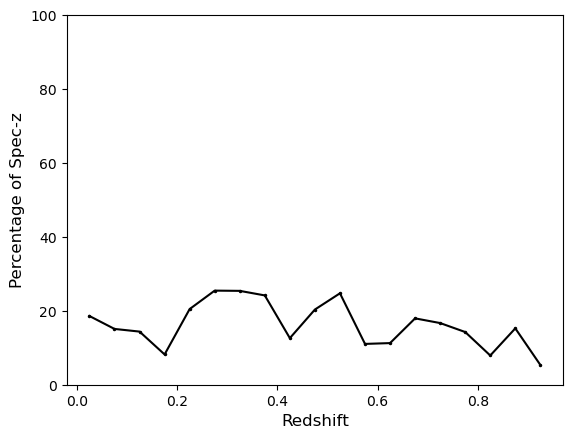

In [33]:
plt.figure()
plt.plot(0.5*(binz[1:]+binz[:-1]), np.array(fraction)*100, 'k.-', markersize=3)
plt.xlabel("Redshift",fontsize=12)
plt.ylabel("Percentage of Spec-z",fontsize=12)
plt.ylim(0,100)
plt.show()